# Modeling 

In [2]:
import numpy as np
import pandas as pd
from modeling import baseline_modeling
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

## Setting dataframes
- df_baseline is just numerical data
- just metadata dataframe (in the works)
- df_text is with vectorized description
    - this was already split into train and test sets to preprocess
    - going to be joined to df after splitting into train/test

In [3]:
# load in dataframe
df = pd.read_csv('csv_files/9_1_all_books_df.csv')

In [4]:
# this just includes pages and ratings along with the target of best seller or not
df_baseline = df[['rating', 'pages', 'best_seller']]

In [5]:
# this data is already split into the training set with a reset index
# so it will be concated with the df after spliting into train and test sets
df_text_X = pd.read_csv('csv_files/X_train_nlp.csv')
df_text_y= pd.read_csv('csv_files/y_train_nlp.csv', header=None)
df_text_X_test = pd.read_csv('csv_files/X_test_nlp.csv')
df_text_y_test = pd.read_csv('csv_files/y_test_nlp.csv', header=None)

In [6]:
# target names is in modeling.py

In [7]:
# split the dataset into training and validation datasets for just numerical data
X_train_rating, X_test_rating, y_train_rating, y_test_rating = train_test_split(df_baseline[['rating', 'pages']], 
                                                                    df_baseline['best_seller'], 
                                                                    test_size = .2,
                                                                   random_state=42)

In [8]:
df_text = df_text_X 

In [9]:
df_text['_target'] = df_text_y[0]

In [10]:
df_text['_target'].dtype

dtype('int64')

In [11]:
df_text.head()

,aaron,ab,abandon,abandonment,abby,abc,abduct,abducted,ability,able,...,zest,zeus,zillion,zimmer,zoe,zone,zoom,zorie,zoroastrian,_target
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# deep vs shallow copies
df_text_X = df_text_X.loc[:, df_text_X.columns != '_target']

In [13]:
y_train_rating.tail()

1095    1
1130    1
1294    1
860     0
1126    1
Name: best_seller, dtype: int64

## Numerical Baseline model
- On numerical data only
- the first uses the `'stratified'` strategy to predict, the second uses the `'most_frequent'` strategy

In [14]:
base = DummyClassifier(strategy= 'stratified', random_state=42)


In [15]:
# run twice to display image?
baseline_modeling(base, X_train_rating, y_train_rating)

{'clf score': 0.663023679417122, 'clf confusion': array([[681, 190],
        [180,  47]])}

# Tree based Modeling

## Numerical Random Forest

In [16]:
rf = RandomForestClassifier()

{'clf score': 0.9817850637522769, 'clf confusion': array([[869,   2],
        [ 18, 209]])}

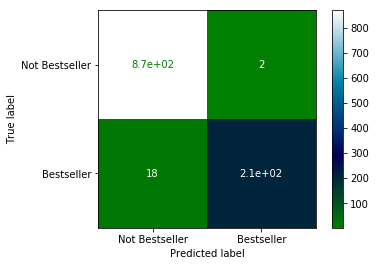

In [17]:
baseline_modeling(rf, X_train_rating, y_train_rating)

{'clf score': 0.982695810564663, 'clf confusion': array([[868,   3],
        [ 16, 211]])}

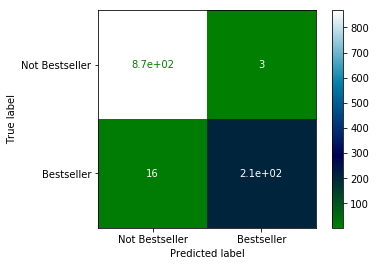

In [18]:
baseline_modeling(rf, X_train_rating, y_train_rating)

In [19]:
# random_forest.decision_path(X_train_rating)

In [20]:
# random_forest.decision_path(X_test_rating)

In [21]:
# random_forest.feature_importances_

## Text Modeling Random Forest

In [22]:
rf_text = RandomForestClassifier()

{'clf score': 0.98816029143898, 'clf confusion': array([[870,   1],
        [ 12, 215]])}

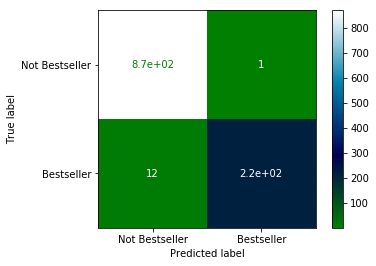

In [23]:
baseline_modeling(rf_text, df_text_X, df_text_y[0])


# Logistic Regression

## Numerical Logistic

In [24]:
log  = LogisticRegression()

{'clf score': 0.807832422586521, 'clf confusion': array([[862,   9],
        [202,  25]])}

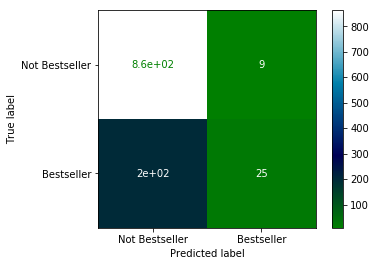

In [26]:
baseline_modeling(log, X_train_rating, y_train_rating)

## Text Modeling Logistic 

In [25]:
log_text = LogisticRegression()

{'clf score': 0.9653916211293261, 'clf confusion': array([[871,   0],
        [ 38, 189]])}

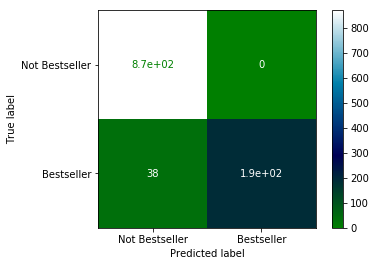

In [27]:
baseline_modeling(log_text, df_text_X, df_text_y[0] )

# TODO
- model optimization 
- testing data